In [17]:
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [18]:
face_cascade=cv2.CascadeClassifier('./face_detector/haarcascade_frontalface_default.xml')

In [19]:
img1=cv2.imread('test1.jfif')

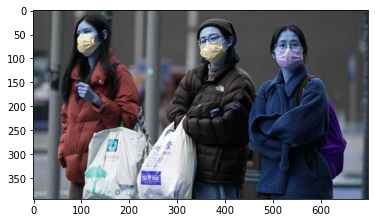

In [20]:
plt.imshow(np.squeeze(img1))

In [21]:
labels_dict={0:'YES',1:'NO'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [22]:
model=load_model('MaskNet.model')

True

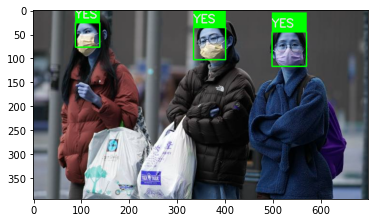

In [23]:
faces=face_cascade.detectMultiScale(img1,1.1,4)
for x,y,w,h in faces:
    face_img=img1[y:y+h,x:x+w]
    resize=cv2.resize(face_img,(224,224))
    resize=resize/255.0
    reshape=np.reshape(resize,(1,224,224,3))
    result=model.predict(reshape)
    #print(result)
    label=np.argmax(result[0])
    #print(label)
    cv2.rectangle(img1,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img1,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img1,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(225,225,225),2)

plt.imshow(np.squeeze(img1))
cv2.imwrite('result1.jpg',img1)

In [24]:
img2=cv2.imread('test2.jpg')

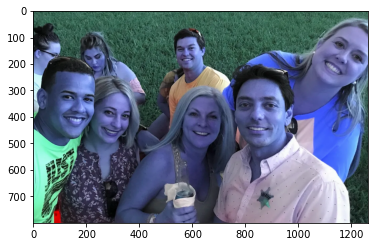

In [25]:
plt.imshow(np.squeeze(img2))

True

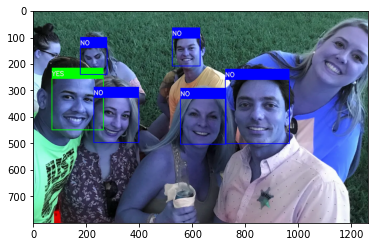

In [26]:
faces=face_cascade.detectMultiScale(img2,1.1,4)
for x,y,w,h in faces:
    face_img=img2[y:y+h,x:x+w]
    resize=cv2.resize(face_img,(224,224))
    resize=resize/255.0
    reshape=np.reshape(resize,(1,224,224,3))
    result=model.predict(reshape)
    #print(result)
    label=np.argmax(result[0])
    #print(label)
    
    cv2.rectangle(img2,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img2,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img2,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(225,225,225),2)

plt.imshow(np.squeeze(img2))
cv2.imwrite('result2.jpg',img2)